In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Reference: https://github.com/ageron/handson-ml/issues/301

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [5]:
train_img_arr, test_img_arr, train_label, test_label = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=0)

In [6]:
print('training input size', train_img_arr.shape)

training input size (49000, 784)


In [7]:
print('test input size', test_img_arr.shape)

test input size (21000, 784)


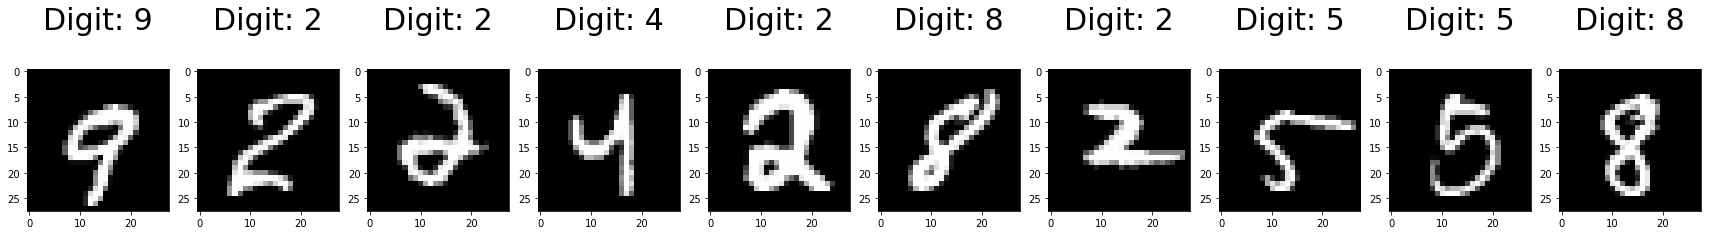

In [8]:
plt.figure(figsize=(30,5))
for index, (image, label) in enumerate(zip(train_img_arr[0:10], train_label[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title('Digit: %i\n' % label, fontsize = 30)

# Model Development

In [9]:
start = int(round(time.time() * 1000))

In [10]:
LR = LogisticRegression(solver='liblinear',max_iter=10)
LR.fit(train_img_arr,train_label)
end = int(round(time.time() * 1000))
print("--NN fitting finished in ", (end-start), "ms--------------")
predicted=LR.predict(test_img_arr)
expected=test_label

--NN fitting finished in  22994 ms--------------


In [11]:
print(cross_val_score(LR, train_img_arr, train_label, cv=5))

[0.9116597  0.9148133  0.91163265 0.91008369 0.91201388]


In [12]:
print("Accuracy is:",round(metrics.accuracy_score(expected,predicted)*100,2))

Accuracy is: 91.13


In [13]:
print("Classification report for kNN classifier %s:\n%s\n"
     % (LR, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for kNN classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2008
           1       0.95      0.97      0.96      2412
           2       0.91      0.89      0.90      2045
           3       0.89      0.88      0.89      2082
           4       0.91      0.92      0.91      2078
           5       0.90      0.84      0.87      1920
           6       0.94      0.96      0.95      2078
           7       0.94      0.92      0.93      2191
           8       0.85      0.87      0.86      2093
           9       0.87      0.88      0.88      2093

   micro avg       0.91      0.91      0.91     21000
   macro avg       0.91      0.91      0

In [14]:
print("Test error is:",100-round(metrics.accuracy_score(expected,predicted)*100,2))

Test error is: 8.870000000000005


In [15]:
misclassified_sample = []
index = 0
for actual, predict in zip(expected, predicted):
    if actual != predict:
        misclassified_sample.append(index)
    index += 1

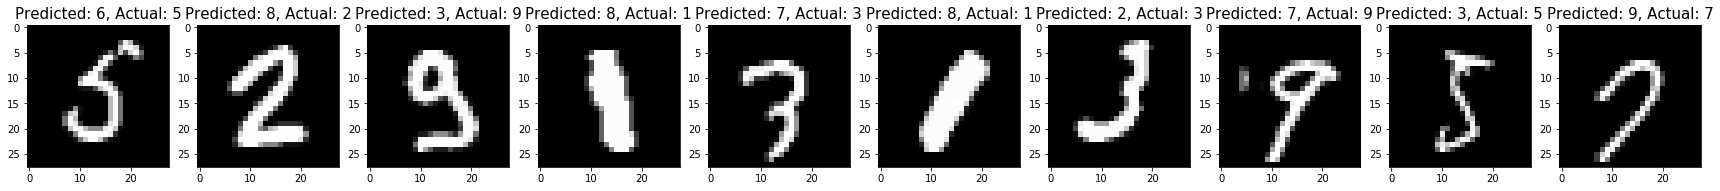

In [16]:
plt.figure(figsize=(30,5))
for index, fail_index in enumerate(misclassified_sample[0:10]):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(test_img_arr[fail_index], (28,28)), cmap='gray')
    plt.title('Predicted: {}, Actual: {}'.format(predicted[fail_index], expected[fail_index]), fontsize = 15)